

## 2.1 Code for scraping data from website



In [ ]:
##---------Type the code below this line------------------##
#Importing the libraries
import requests, json 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2,mutual_info_classif,SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import reverse_geocoder as rg
from scipy.stats import chi2_contingency
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [ ]:
# Scrapping the data from NASA website
url='https://data.nasa.gov/api/views/dd9e-wu2v/rows.json'
res = requests.get(url)
response = json.loads(res.text)

## 2.2 Code for converting the above scraped data into a dataframe

In [ ]:
##---------Type the code below this line------------------##
#Converting the scraped data into a dataframe using Pandas library.
df = pd.DataFrame(response['data'])
col_list=[]
col= pd.DataFrame(response['meta'])
for item in range(len(df.columns)):
    col_list.append(col.loc['columns']['view'][item]['fieldName'])
    
df.columns=col_list

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [ ]:
##---------Type the code below this line------------------##
#Displaying the first 5 data records using the method head.
df.head()

,:sid,:id,:position,:created_at,:created_meta,:updated_at,:updated_meta,:meta,source_name,source_link,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,row-ggqu.6crr-9j8k,00000000-0000-0000-D01F-2E8F58051638,0,1560382487,None,1560382487,None,{ },AGU,[https://blogs.agu.org/landslideblog/2008/10/1...,...,CN,Shaanxi,0,Jingyang,41.02145,2014-04-01T00:00:00,2017-11-20T15:17:00,2018-02-15T15:51:00,107.45,32.5625
1,row-q9z6_pxvs.kszd,00000000-0000-0000-E28A-7389D458DF32,0,1560382487,None,1560382487,None,{ },Oregonian,[http://www.oregonlive.com/news/index.ssf/2009...,...,US,Oregon,36619,Lake Oswego,0.60342,2014-04-01T00:00:00,2017-11-20T15:17:00,2018-02-15T15:51:00,-122.663,45.42
2,row-r6qf_r7aw-vu69,00000000-0000-0000-F4B2-D045E983927D,0,1560382487,None,1560382487,None,{ },CBS News,[https://www.cbsnews.com/news/dozens-missing-a...,...,PE,Junín,14708,San Ramón,0.85548,2014-04-01T00:00:00,2017-11-20T15:17:00,2018-02-15T15:51:00,-75.3587,-11.1295
3,row-kv96.ut6t-gq27,00000000-0000-0000-4405-4BD462EC2986,0,1560382487,None,1560382487,None,{ },Reuters,[https://in.reuters.com/article/idINIndia-4145...,...,NP,Mid Western,20908,Dailekh,0.75395,2014-04-01T00:00:00,2017-11-20T15:17:00,2018-02-15T15:51:00,81.708,28.8378
4,row-j4mn.44im.64rk,00000000-0000-0000-2B5C-B99DA3EBB7BA,0,1560382487,None,1560382487,None,{ },The Freeman,[http://www.philstar.com/cebu-news/621414/land...,...,PH,Central Visayas,798634,Cebu City,2.02204,2014-04-01T00:00:00,2017-11-20T15:17:00,2018-02-15T15:51:00,123.8978,10.3336


In [ ]:
#Displaying the first 5 data records using the method tail.
df.tail()

,:sid,:id,:position,:created_at,:created_meta,:updated_at,:updated_meta,:meta,source_name,source_link,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
11028,row-ypjc_bhrb.wzpb,00000000-0000-0000-E6B4-2B1322F59122,0,1560382487,None,1560382487,None,{ },The Jakarta Post,[http://www.thejakartapost.com/news/2017/04/02...,...,None,None,None,None,None,2017-07-28T13:34:00,2017-12-19T21:42:00,2018-02-15T15:51:00,111.6799444,-7.853409423
11029,row-4iqi.6ri6_aq35,00000000-0000-0000-4351-2204DC4A9BEF,0,1560382487,None,1560382487,None,{ },Greater Kashmir,[http://www.greaterkashmir.com/news/jammu/land...,...,None,None,None,None,None,2017-09-21T17:32:00,2017-12-05T18:45:00,2018-02-15T15:51:00,75.68061125,33.40307977
11030,row-7ihg_fmui~ncik,00000000-0000-0000-8491-A32B10BDB4F5,0,1560382487,None,1560382487,None,{ },NBC Daily,[http://www.nbcdaily.com/separate-landslides-k...,...,None,None,None,None,None,2017-07-26T13:22:00,2017-12-08T20:37:00,2018-02-15T15:51:00,91.772042,26.181606
11031,row-a5eg-gbzs-fmvm,00000000-0000-0000-518E-A46954B3C0A7,0,1560382487,None,1560382487,None,{ },AGU Landslide Blog,[http://blogs.agu.org/landslideblog/2017/05/02...,...,None,None,None,None,None,2017-07-14T19:03:00,2017-12-07T21:19:00,2018-02-15T15:51:00,73.47237853,40.88639497
11032,row-a2rd~eaj4-mqzb,00000000-0000-0000-CAEF-8AA9E5787FEC,0,1560382487,None,1560382487,None,{ },The Times of India,[https://timesofindia.indiatimes.com/city/hyde...,...,None,None,None,None,None,2017-10-05T14:32:00,2017-12-08T19:57:00,2018-02-15T15:51:00,78.35650524,17.46562972


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [ ]:
##---------Type the code below this line------------------##
df.info() # print the column headings and column data types in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   :sid                       11033 non-null  object
 1   :id                        11033 non-null  object
 2   :position                  11033 non-null  int64 
 3   :created_at                11033 non-null  int64 
 4   :created_meta              0 non-null      object
 5   :updated_at                11033 non-null  int64 
 6   :updated_meta              0 non-null      object
 7   :meta                      11033 non-null  object
 8   source_name                11033 non-null  object
 9   source_link                10187 non-null  object
 10  event_id                   11033 non-null  object
 11  event_date                 11033 non-null  object
 12  event_time                 0 non-null      object
 13  event_title                11033 non-null  object
 14  event_

In [ ]:
df.describe(include='O') #statistical description and summary

,:sid,:id,:created_meta,:updated_meta,:meta,source_name,source_link,event_id,event_date,event_time,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
count,11033,11033,0,0,11033,11033,10187,11033,11033,0,...,9471,9396,9471,9470,9471,11023,11032,11033,11033,11033
unique,11033,11033,0,0,1,3918,8294,11033,6550,0,...,140,887,3496,4389,9281,3786,419,1,10744,10657
top,row-ggqu.6crr-9j8k,00000000-0000-0000-D01F-2E8F58051638,NaN,NaN,{ },Oregon DOT,[http://maps.google.com.br/maps/ms?source=embe...,684,2010-04-06T00:00:00,NaN,...,US,Oregon,0,Niterói,23.18065,2014-04-01T00:00:00,2017-11-20T15:17:00,2018-02-15T15:51:00,-123.8481,45.5635
freq,1,1,NaN,NaN,11033,768,104,1,115,NaN,...,2992,948,1124,48,5,5255,10113,11033,6,9


In [ ]:
df.shape

(11033, 39)

In [ ]:
sum(df.isnull().sum())

85365

# 3. Data Preparation

## 3.1 Display how many unique values are present in each attribute


In [ ]:
##---------Type the code below this line------------------##
# we are dropping the attributes which are not necessary such as created date, submitted date, etc
data=df.drop([':sid',':id',':position',':created_at',':created_meta',':updated_at',':updated_meta',':meta',
              'source_name','source_link','event_id','event_title','event_description','event_time',
            'location_description','photo_link','event_import_id','country_code','submitted_date','created_date',
          'last_edited_date','notes' ], axis=1)
# checking the unique values for each attribute
data.nunique()

event_date                    6550
location_accuracy                9
landslide_category              14
landslide_trigger               18
landslide_size                   6
landslide_setting               14
fatality_count                 105
injury_count                    42
storm_name                     217
event_import_source              3
country_name                   141
admin_division_name            887
admin_division_population     3496
gazeteer_closest_point        4389
gazeteer_distance             9281
longitude                    10744
latitude                     10657
dtype: int64

## 3.2 Check for the presence of duplicate data, identify the attributes with duplicate data, report the attributes. Mention the method adopted to remove duplicate data if present. Report the results again.

In [ ]:
##---------Type the code below this line------------------##
#Checking for the presence of duplicate data
sum(data.duplicated()==True)

19

Observation : As the output is giving there are 19 duplicates, hence we will remove those values.

In [ ]:
data=data[data.duplicated()==False]

In [ ]:
print(data.duplicated().any())

False


Hence no more duplicates left.

## 3.3 Show whether there are any missing values in each attribute. Report the same.

In [ ]:
##---------Type the code below this line------------------##
data.isnull().sum()

event_date                       0
location_accuracy                2
landslide_category               1
landslide_trigger               23
landslide_size                   9
landslide_setting               68
fatality_count                1381
injury_count                  5665
storm_name                   10440
event_import_source           1553
country_name                  1552
admin_division_name           1627
admin_division_population     1552
gazeteer_closest_point        1553
gazeteer_distance             1552
longitude                        0
latitude                         0
dtype: int64

Observation : We have observed that multiple columns have missing values such as landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count, event_import_source, country_name,admin_division_name,admin_division_population, gazeteer_closest_point and gazeteer_distance 

## 3.4 Clean the missing data using any imputation technique, mention the method used and again report the change after cleaning the data.

In [ ]:
##---------Type the code below this line------------------##

We are checking the missing values in all the columns and fix the missing values using imputation technique i.e fill the missing values with Mean\Median\Mode values based on the analysis of column data .


In [ ]:
# Using value_counts() function to check the count of unique values of location_accuracy
data["location_accuracy"].value_counts()

5km        3175
1km        2182
25km       1468
10km       1427
exact      1385
50km        794
unknown     540
100km        25
250km        16
Name: location_accuracy, dtype: int64

In [ ]:
# We are using mode value to impute  the missing value in the attribute
data["location_accuracy"]=data["location_accuracy"].fillna(data["location_accuracy"].mode()[0])

In [ ]:
# Using value_counts() function to check the count of unique values of landslide_category
data["landslide_category"].value_counts()

landslide              7632
mudslide               2099
rock_fall               669
complex                 232
debris_flow             194
other                    68
unknown                  38
riverbank_collapse       37
snow_avalanche           15
translational_slide       9
lahar                     7
earth_flow                7
creep                     5
topple                    1
Name: landslide_category, dtype: int64

In [ ]:
# We are using mode value to impute  the missing value in the attribute
data["landslide_category"]=data["landslide_category"].fillna(data["landslide_category"].mode()[0])

In [ ]:
# Using value_counts() function to check the count of unique values of landslide_trigger
data["landslide_trigger"].value_counts()

downpour                   4676
rain                       2588
unknown                    1688
continuous_rain             747
tropical_cyclone            557
snowfall_snowmelt           135
monsoon                     129
mining                       92
earthquake                   89
construction                 82
flooding                     74
no_apparent_trigger          44
freeze_thaw                  41
other                        26
dam_embankment_collapse      12
leaking_pipe                  9
volcano                       1
vibration                     1
Name: landslide_trigger, dtype: int64

In [ ]:
# We are using mode value (downpour) to impute  the missing value in the attribute
data["landslide_trigger"]=data["landslide_trigger"].fillna(data["landslide_trigger"].mode()[0])

In [ ]:
# Using value_counts() function to check the count of unique values of landslide_size
data["landslide_size"].value_counts()

medium          6540
small           2760
unknown          851
large            749
very_large       102
catastrophic       3
Name: landslide_size, dtype: int64

In [ ]:
# We are using mode value to impute  the missing value in the attribute
data["landslide_size"]=data["landslide_size"].fillna(data["landslide_size"].mode()[0])

In [ ]:
# Using value_counts() function to check the count of unique values of landslide_setting
data["landslide_setting"].value_counts()

unknown             6284
above_road          3097
natural_slope        529
urban                263
below_road           199
mine                 157
above_river          149
deforested_slope      53
other                 49
retaining_wall        48
bluff                 48
burned_area           28
engineered_slope      22
above_coast           20
Name: landslide_setting, dtype: int64

In [ ]:
# We are using mode value (unknown) to impute  the missing value in the attribute
data["landslide_setting"]=data["landslide_setting"].fillna(data["landslide_setting"].mode()[0])

In [ ]:
data["fatality_count"].value_counts()

0      7195
1       623
2       403
3       297
4       191
       ... 
378       1
200       1
85        1
69        1
113       1
Name: fatality_count, Length: 105, dtype: int64

In [ ]:
# We are using mode value to impute  the missing value in the attribute
data["fatality_count"]=data["fatality_count"].fillna(data["fatality_count"].mode()[0])

In [ ]:
# Using value_counts() function to check the count of unique values of injury_count
data["injury_count"].value_counts()

0      4774
1       197
2       106
3        74
5        36
4        32
7        18
6        17
12       12
10       11
8        10
9         7
20        6
11        4
19        4
18        3
17        3
15        3
26        2
25        2
100       2
16        2
50        2
28        2
22        2
21        2
38        1
374       1
40        1
45        1
150       1
32        1
225       1
33        1
52        1
27        1
46        1
13        1
54        1
14        1
24        1
332       1
Name: injury_count, dtype: int64

In [ ]:
# We are using mode value  to impute  the missing value in the attribute
data["injury_count"]=data["injury_count"].fillna(data["injury_count"].mode()[0])

In [ ]:
# Using value_counts() function to check the count of unique values of event_import_source
data["event_import_source"].value_counts()

glc                                                                                 9370
test                                                                                  90
Included as a subset of an article, more information may be found somewhere else       1
Name: event_import_source, dtype: int64

In [ ]:
# We are using mode value (glc) to impute  the missing value in the attribute
data["event_import_source"]=data["event_import_source"].fillna(data["event_import_source"].mode()[0])

In [ ]:
# Using value_counts() function to check the count of unique values of storm_name
data["storm_name"].value_counts()

Supertyphoon Juan (Megi)      32
Tropical Depression Parma     23
Agaton                        20
Tropical Depression Urduja    15
Tropical Storm Tomas          14
                              ..
Tropical Storm Kabayan         1
Wipha                          1
Giovanna                       1
Typhoon Etau                   1
Cyclone Vardah                 1
Name: storm_name, Length: 217, dtype: int64

We have added the new feature storm in our dataset and used the method notnull() to set the  non-missing values (storm happened) mapped to true and missing values (storm not happened) get mapped to false in the column storm 

In [ ]:
data['storm']=data['storm_name'].notnull()
data=data.drop(['storm_name'], axis=1)

In [ ]:
data['storm']=data['storm'].astype(int)

Reverse geocoding permits the identification of nearby street addresses, places,and/or areal subdivisions such as neighbourhoods, county, state, or country.

In [ ]:
# Convert latitude and longitude columns to a tuple of tuples
coords = tuple(zip(data['latitude'], data['longitude']))
# Here , we are using the library reverse geocoding to change the latitude and longitude addresses to three new columns- city,country code and admin division 
geocode = rg.search(coords)
cc = [x.get('cc') for x in geocode]
data['countrycode'] = cc

admin = [x.get('admin1') for x in geocode]
data['admindivision'] = admin

city = [x.get('name') for x in geocode]
data['city'] = city

Loading formatted geocoded file...


As we have created the new columns based on latitude and longitude addresses so we are dropping below columns which is redundant.


In [ ]:
data=data.drop(['admin_division_population'], axis=1)
data=data.drop(['country_name'], axis=1)
data=data.drop(['gazeteer_distance'], axis=1)
data=data.drop(['admin_division_name','gazeteer_closest_point',], axis=1)
#Finally We are dropping the latitude and longitude columns.
data=data.drop(['longitude','latitude',], axis=1)

In [ ]:
#Checking the newly created columns storm\countrycode\admindivision\city in the dataset 
data.head()

,event_date,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,event_import_source,storm,countrycode,admindivision,city
0,2008-08-01T00:00:00,unknown,landslide,rain,large,mine,11,0,glc,0,CN,Shaanxi,Jingyang
1,2009-01-02T02:00:00,5km,mudslide,downpour,small,unknown,0,0,glc,0,US,Oregon,Lake Oswego
2,2007-01-19T00:00:00,10km,landslide,downpour,large,unknown,10,0,glc,0,PE,Junin,San Ramon
3,2009-07-31T00:00:00,unknown,landslide,monsoon,medium,unknown,1,0,glc,0,NP,Mid Western,Dailekh
4,2010-10-16T12:00:00,5km,landslide,tropical_cyclone,medium,unknown,0,0,glc,1,PH,Central Visayas,Cebu City


In [ ]:
#Checking the null values in dataset again for confirmation .
data.isnull().sum()

event_date             0
location_accuracy      0
landslide_category     0
landslide_trigger      0
landslide_size         0
landslide_setting      0
fatality_count         0
injury_count           0
event_import_source    0
storm                  0
countrycode            0
admindivision          0
city                   0
dtype: int64

We have performed the Imputation and some data cleaning steps in columns having null values and finally prepared our data .

## 3.5 Check if all the attributes are following the same format and are consistent. If not, report all such attributes and what inconsistencies are present.

In [ ]:
# Checking the columns in the dataset
data.columns

Index(['event_date', 'location_accuracy', 'landslide_category',
       'landslide_trigger', 'landslide_size', 'landslide_setting',
       'fatality_count', 'injury_count', 'event_import_source', 'storm',
       'countrycode', 'admindivision', 'city'],
      dtype='object')

We are checking the inconsistent data in the features of our dataset.

In [ ]:
data['location_accuracy'].unique()

array(['unknown', '5km', '10km', '25km', 'exact', '1km', '50km', '250km',
       '100km'], dtype=object)

In [ ]:
data['landslide_category'].unique()


array(['landslide', 'mudslide', 'complex', 'rock_fall', 'debris_flow',
       'riverbank_collapse', 'other', 'unknown', 'lahar',
       'snow_avalanche', 'creep', 'earth_flow', 'translational_slide',
       'topple'], dtype=object)

In [ ]:
lt=data['landslide_trigger'].unique()
lt.sort()
lt

array(['construction', 'continuous_rain', 'dam_embankment_collapse',
       'downpour', 'earthquake', 'flooding', 'freeze_thaw',
       'leaking_pipe', 'mining', 'monsoon', 'no_apparent_trigger',
       'other', 'rain', 'snowfall_snowmelt', 'tropical_cyclone',
       'unknown', 'vibration', 'volcano'], dtype=object)

In [ ]:
data['landslide_size'].unique()

array(['large', 'small', 'medium', 'unknown', 'very_large',
       'catastrophic'], dtype=object)

In [ ]:
data['landslide_setting'].unique()

array(['mine', 'unknown', 'above_road', 'urban', 'natural_slope',
       'engineered_slope', 'below_road', 'above_river', 'retaining_wall',
       'other', 'above_coast', 'bluff', 'burned_area', 'deforested_slope'],
      dtype=object)

In [ ]:
data["fatality_count"] = pd.to_numeric(data["fatality_count"])
fc=data['fatality_count'].unique()
fc.sort()
fc

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   52,   53,   54,   55,
         56,   59,   60,   63,   64,   66,   68,   69,   70,   71,   72,
         73,   78,   83,   84,   85,   91,   92,  100,  101,  103,  104,
        105,  108,  109,  113,  114,  128,  145,  151,  174,  182,  196,
        200,  234,  240,  250,  253,  277,  280,  312,  329,  378,  388,
        424,  430,  491, 1765, 2100, 5000], dtype=int64)

In [ ]:
data["injury_count"] = pd.to_numeric(data["injury_count"])
ic=data['injury_count'].unique()
ic.sort()
ic

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  24,  25,  26,
        27,  28,  32,  33,  38,  40,  45,  46,  50,  52,  54, 100, 150,
       225, 332, 374], dtype=int64)

In [ ]:
data['event_import_source'].unique()

array(['glc',
       'Included as a subset of an article, more information may be found somewhere else',
       'test'], dtype=object)

In [ ]:
data['storm'].unique()

array([0, 1])

In [ ]:
data['countrycode'].unique()

array(['CN', 'US', 'PE', 'NP', 'PH', 'MX', 'VN', 'DZ', 'MY', 'ID', 'SL',
       'BN', 'IT', 'IN', 'AU', 'JP', 'BR', 'PK', 'CA', 'GH', 'TT', 'BD',
       'PA', 'AT', 'GT', 'NG', 'NZ', 'GB', 'HR', 'KE', 'MM', 'RU', 'KG',
       'TW', 'TJ', 'GE', 'ZA', 'LK', 'EG', 'HK', 'SB', 'LC', 'HT', 'AR',
       'GL', 'GR', 'CH', 'DE', 'LT', 'IR', 'FR', 'KZ', 'SV', 'TH', 'CO',
       'JM', 'CR', 'HN', 'BT', 'FJ', 'YE', 'EC', 'IE', 'CI', 'DO', 'ES',
       'DM', 'BG', 'LB', 'IS', 'NI', 'AE', 'CL', 'VE', 'KR', 'MW', 'UG',
       'TR', 'PR', 'NO', 'SZ', 'BZ', 'BA', 'MU', 'PG', 'BO', 'LA', 'CM',
       'KP', 'AZ', 'SK', 'BB', 'GN', 'MK', 'RS', 'ET', 'SI', 'VU', 'PT',
       'BM', 'AS', 'GD', 'AF', 'TZ', 'RO', 'RW', 'CZ', 'LR', 'AM', 'MG',
       'VC', 'UA', 'SA', 'ME', 'IL', 'UZ', 'GU', 'IM', 'PS', 'CG', 'VI',
       'AL', 'JE', 'AO', 'CU', 'CD', 'OM', 'NA', 'ZM', 'PL', 'PY', 'MN',
       'BF', 'TL', 'BI', 'SD', 'GA', 'MA', 'KN', 'KH', 'LU', 'VA', 'NC',
       'PF', 'ZW', 'GG', 'WF', 'JO'], dtype=object)

In [ ]:
ad=data['admindivision'].unique()
ad.sort()
ad

array(['', 'Aakkar', 'Abia', 'Abruzzo', 'Abseron',
       'Abuja Federal Capital Territory', 'Aceh', 'Adis Abeba',
       'Adjuntas', 'Agsu', 'Aguada', 'Ahuachapan', 'Aichi', 'Aileu',
       'Ajaria', 'Akershus', 'Akita', 'Al Mahwit', 'Alabama', 'Alajuela',
       'Alaotra Mangoro', 'Alaska', 'Alberta', 'Almaty Oblysy',
       'Almaty Qalasy', 'Alta Verapaz', 'Amapa', 'Amhara', 'An Giang',
       'Analamanga', 'Anambra', 'Ancash', 'Andalusia',
       'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Anhui Sheng',
       'Anse-la-Raye', 'Antioquia', 'Antofagasta', 'Aosta Valley',
       'Apurimac', 'Aragon', 'Aragua', 'Arequipa', 'Arizona', 'Arkansas',
       'Artemisa', 'Artibonite', 'Artvin', 'Arunachal Pradesh', 'Arusha',
       'As Suways', 'Asan', 'Assam', 'Astara', 'Asturias', 'Atacama',
       'Atlantico Norte (RAAN)', 'Atsinanana', 'Auckland',
       'Autonomous Region in Muslim Mindanao', 'Ayacucho', 'Az Zahirah',
       'Azad Kashmir', 'Azores', 'Azuay', 'Bac Giang', 'Bac Kan'

In [ ]:
ct=data['city'].unique()
ct.sort()
ct

array(["'Aiea", 'A Luoi', "A'yi Take", ..., 'Zurite',
       '`Alaqahdari Atghar', '`Ibri'], dtype=object)

In [ ]:
# for event date column we will first extract month day and time in separate column
data['event_date'] = pd.to_datetime(data['event_date'], format = "%Y-%m-%dT%H:%M:%S.%f")
data['month']=data['event_date'].dt.month_name()
data['day']=data['event_date'].dt.day_name()
data['hour']=data['event_date'].dt.hour

In [ ]:
# discretization of hour of event date
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
# adding custom labels for bins
labels = ['midnight', 'dawn', 'early morning', 'morning','noon','afternoon','evening','night']
# add the bins to the dataframe
data['time_bin'] = pd.cut(data['hour'], bins, labels=labels, right=False)

In [ ]:
data=data.drop(['hour','event_date'], axis=1)

In [ ]:
data['month'].unique()

array(['August', 'January', 'July', 'October', 'February', 'March',
       'September', 'November', 'December', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
data['day'].unique()

array(['Friday', 'Saturday', 'Thursday', 'Sunday', 'Wednesday', 'Monday',
       'Tuesday'], dtype=object)

In [ ]:
data['time_bin'].unique()

['midnight', 'noon', 'early morning', 'night', 'evening', 'morning', 'dawn', 'afternoon']
Categories (8, object): ['midnight' < 'dawn' < 'early morning' < 'morning' < 'noon' < 'afternoon' < 'evening' < 'night']

## 3.6 Correct the data if there are inconsistencies from 3.5. Report or print the data after correction.

In [ ]:
##---------Type the code below this line------------------##

In [ ]:
#creating new feature by summing fatality_count and injury_count
data['accident']=data['fatality_count']+data['injury_count']


In [ ]:
data[data['accident']>=100]

,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,event_import_source,storm,countrycode,admindivision,city,month,day,time_bin,accident
143,250km,landslide,continuous_rain,large,unknown,105,0,glc,0,BD,Chittagong,Raojan,June,Tuesday,afternoon,105
652,25km,complex,dam_embankment_collapse,very_large,mine,277,33,glc,0,CN,Shanxi Sheng,Dadeng,September,Monday,early morning,310
679,50km,landslide,downpour,very_large,unknown,234,0,glc,0,IN,Kashmir,Leh,August,Friday,midnight,234
1637,10km,landslide,monsoon,medium,deforested_slope,108,14,glc,0,ID,Central Java,Wonosobo,December,Friday,night,122
3046,exact,mudslide,tropical_cyclone,very_large,natural_slope,430,0,glc,1,PH,Davao,Bantacan,December,Tuesday,midnight,430
3106,25km,landslide,tropical_cyclone,large,unknown,104,0,glc,1,PH,Cordillera,La Trinidad,October,Friday,midnight,104
3126,5km,mudslide,downpour,very_large,unknown,424,0,glc,0,BR,Rio de Janeiro,Teresopolis,January,Wednesday,dawn,424
3214,1km,mudslide,continuous_rain,large,deforested_slope,151,0,glc,0,IN,Maharashtra,Junnar,July,Wednesday,morning,151
3556,50km,landslide,flooding,large,unknown,114,0,glc,0,AF,Kabul,Kabul,March,Wednesday,midnight,114
3852,1km,mudslide,snowfall_snowmelt,large,natural_slope,250,0,glc,0,NP,Central Region,Nagarkot,April,Tuesday,midnight,250


In [ ]:
sum(data['accident']>=100)

36

There are 36 values more than 100 so we will remove them as they are behaving as outliers. Removing them will not effect the dataset as our dataset has 10000+ rows

In [ ]:
data=data[data['accident']<100]

We have checked the unique values of attributes and found that our data has inconsistancy in admindivision column. There are blank present in that feature which we will observe.


In [ ]:
# number of values that has admindivision as blank
data[data['admindivision']==''].shape[0]

60

In [ ]:
# as there are only 2 blanks, we are removing them from dataset
data=data[data.admindivision != '']

In [ ]:
#checking the values again in admindivision
ad=data['admindivision'].unique()
ad.sort()
ad

array(['Aakkar', 'Abia', 'Abruzzo', 'Abseron',
       'Abuja Federal Capital Territory', 'Aceh', 'Adjuntas', 'Agsu',
       'Aguada', 'Ahuachapan', 'Aichi', 'Aileu', 'Ajaria', 'Akershus',
       'Akita', 'Al Mahwit', 'Alabama', 'Alajuela', 'Alaotra Mangoro',
       'Alaska', 'Alberta', 'Almaty Oblysy', 'Almaty Qalasy',
       'Alta Verapaz', 'Amapa', 'Amhara', 'An Giang', 'Analamanga',
       'Anambra', 'Ancash', 'Andalusia', 'Andaman and Nicobar Islands',
       'Andhra Pradesh', 'Anhui Sheng', 'Anse-la-Raye', 'Antioquia',
       'Antofagasta', 'Aosta Valley', 'Apurimac', 'Aragon', 'Aragua',
       'Arequipa', 'Arizona', 'Arkansas', 'Artemisa', 'Artibonite',
       'Artvin', 'Arunachal Pradesh', 'Arusha', 'As Suways', 'Asan',
       'Assam', 'Astara', 'Asturias', 'Atacama', 'Atlantico Norte (RAAN)',
       'Atsinanana', 'Auckland', 'Autonomous Region in Muslim Mindanao',
       'Ayacucho', 'Az Zahirah', 'Azad Kashmir', 'Azores', 'Azuay',
       'Bac Giang', 'Bac Kan', 'Bac Lieu', 'Bad

'event_import_source' has 1 string value which is inconsistancy, we will replace that value.

In [ ]:
data['event_import_source']=data['event_import_source'].str.replace('Included as a subset of an article, more information may be found somewhere else',data['event_import_source'].mode()[0])

In [ ]:
data['event_import_source'].unique()

array(['glc', 'test'], dtype=object)

In [ ]:
data.head()

,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,event_import_source,storm,countrycode,admindivision,city,month,day,time_bin,accident
0,unknown,landslide,rain,large,mine,11,0,glc,0,CN,Shaanxi,Jingyang,August,Friday,midnight,11
1,5km,mudslide,downpour,small,unknown,0,0,glc,0,US,Oregon,Lake Oswego,January,Friday,midnight,0
2,10km,landslide,downpour,large,unknown,10,0,glc,0,PE,Junin,San Ramon,January,Friday,midnight,10
3,unknown,landslide,monsoon,medium,unknown,1,0,glc,0,NP,Mid Western,Dailekh,July,Friday,midnight,1
4,5km,landslide,tropical_cyclone,medium,unknown,0,0,glc,1,PH,Central Visayas,Cebu City,October,Saturday,noon,0


We have removed the inconsistant data from our dataset.

## 3.7 Identify the target variables.


In [ ]:
##---------Type the code below this line------------------##
# we will take 'landslide_size' as our target
Target=pd.DataFrame(columns=['landslide_size'])

As our target column has unknows values we dont want our model to learn about unknown values.
Hence we are removing the rows which has unknown in landslide size. We will also remove the data catastrophic as it has only 3 rows

In [ ]:
data=data[(data.landslide_size != 'unknown') & (data.landslide_size != 'catastrophic')]

In [ ]:
Target['landslide_size']=data['landslide_size']
Target['landslide_size'].value_counts()

medium        6501
small         2749
large          729
very_large      87
Name: landslide_size, dtype: int64

## 3.8 Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)


In [ ]:
##---------Type the code below this line------------------##
y=Target['landslide_size']
X=data.drop(['landslide_size'], axis=1)

We have formed our dataset in the form of (X,y) in order to perform the steps of data modeling.


## 3.9 Discretize the target variable or perform one-hot encoding on the target or any other as and if required.


In [ ]:
##---------Type the code below this line------------------##
label_encoder = LabelEncoder()

# Encode the labels
y= label_encoder.fit_transform(y)

list(label_encoder.classes_)

['large', 'medium', 'small', 'very_large']

We have performed the Label Encoding of our target variable as the target is multiclass.

We will perform descretization on our dataset for all features

In [ ]:
# we will descretize accident column
f_bins = [0,25,50,75,100]

f_labels=[1,2,3,4]

# add the bins to the dataframe
X['accident_bin'] = pd.cut(X['accident'], f_bins, labels=f_labels, right=False)

In [ ]:
X=X.drop(['accident','fatality_count','injury_count'], axis=1)

In [ ]:
# concating the dataset after cleaning
clean_data=pd.concat([X,Target],axis=1)

Encoding the Features of our dataset

In [ ]:
label_encoder = LabelEncoder()
for col in X.columns:
    X[col]= label_encoder.fit_transform(X[col])

# 4. Data Exploration using various plots

## 4.1 Scatter plot of each attribute with the target.

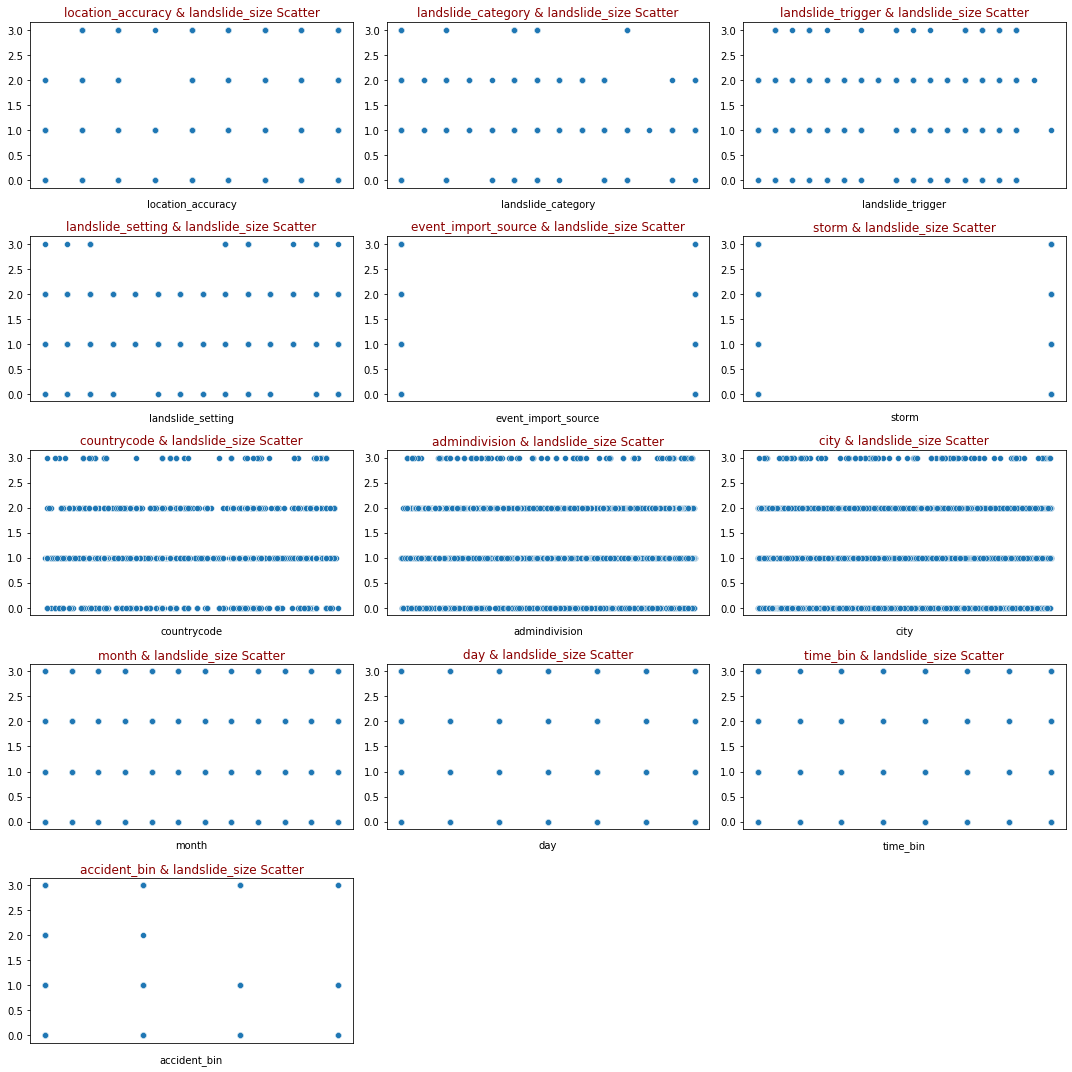

In [ ]:
def draw_scatter(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        
        g1=sns.scatterplot(dataframe[feature], y=y,ax=ax)
        ax.set_title(feature+" & landslide_size Scatter",color='DarkRed')
        g1.set(xticklabels=[])
        g1.tick_params(bottom=False)
    fig.tight_layout() 
    plt.show()
draw_scatter(X,X.columns,5,3)

## 4.2 Pair plot of each attribute to identify the linear relationships among the attributes.


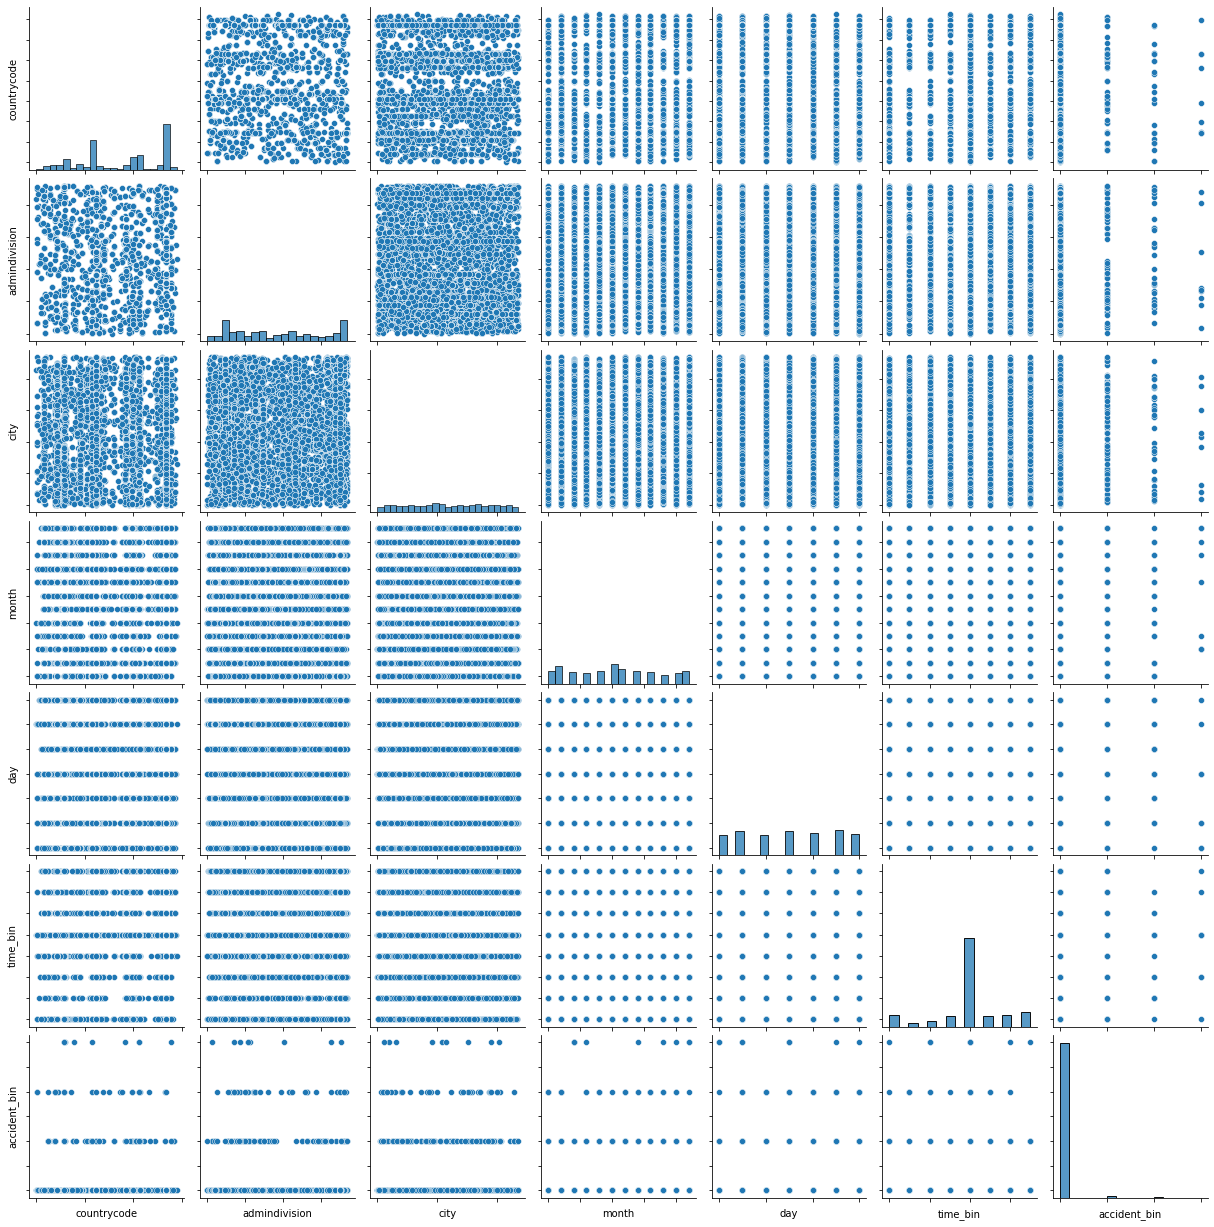

In [ ]:
##---------Type the code below this line------------------##
p1=sns.pairplot(X,vars=['countrycode', 'admindivision', 'city', 'month', 'day',
                        'time_bin', 'accident_bin'], )
p1.set(xticklabels=[])
p1.set(yticklabels=[])
plt.show()

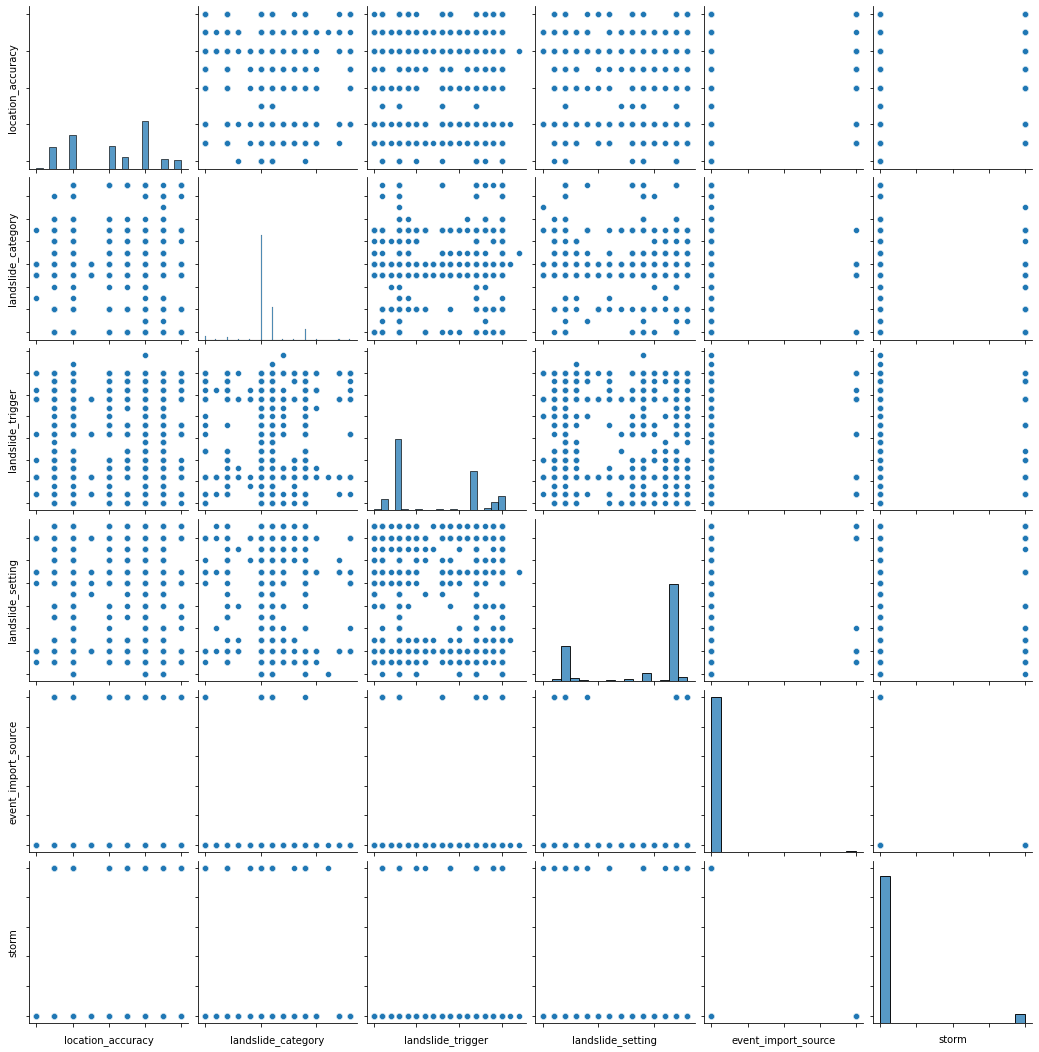

In [ ]:
p2=sns.pairplot(X,vars=['location_accuracy', 'landslide_category', 'landslide_trigger','landslide_setting', 
                        'event_import_source','storm'], )
p2.set(xticklabels=[])
p2.set(yticklabels=[])
plt.show()

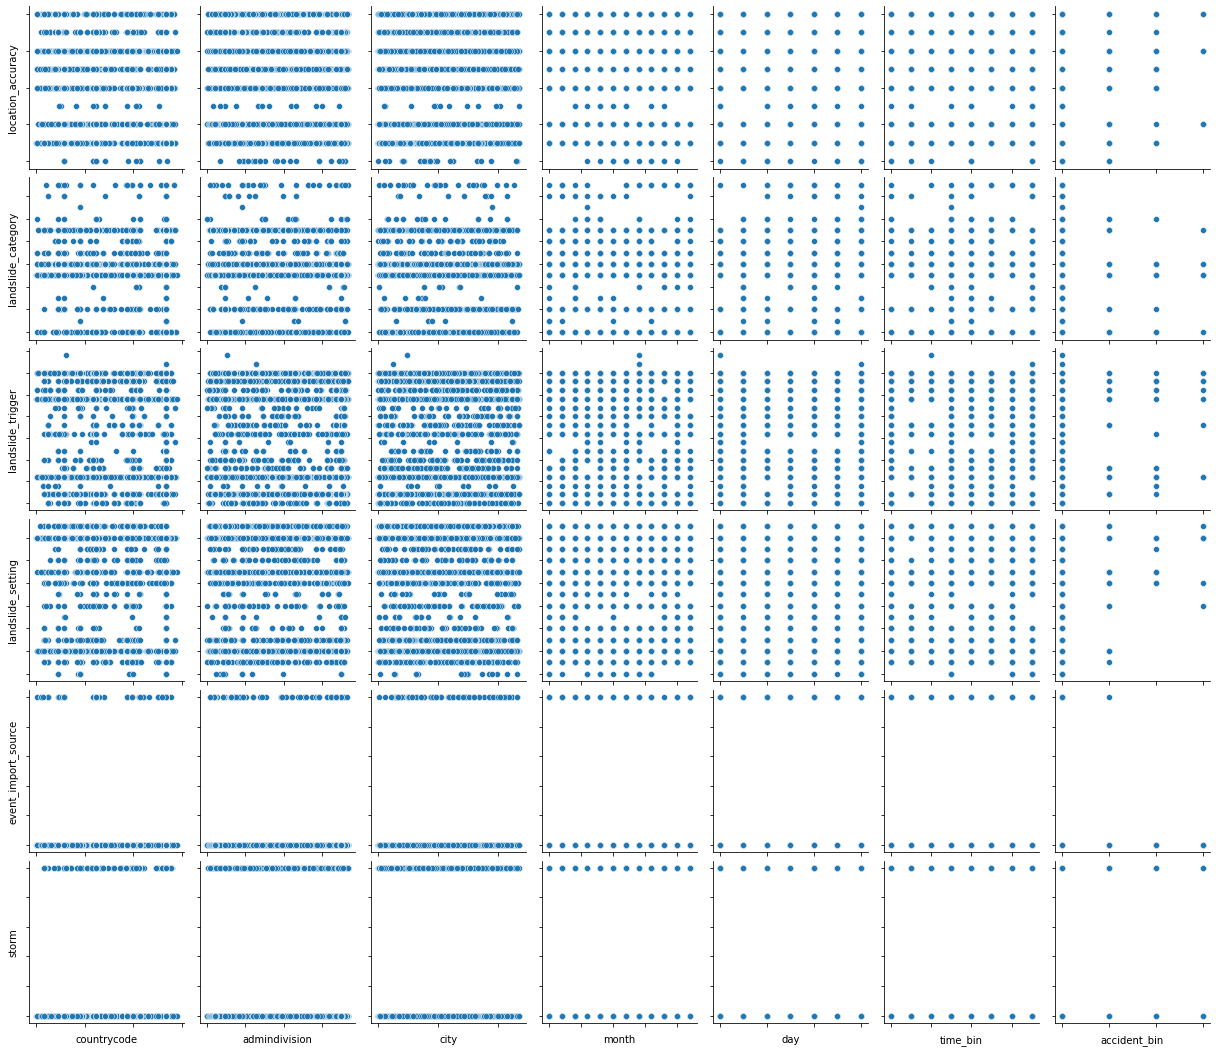

In [ ]:
p3=sns.pairplot(X,x_vars=['countrycode', 'admindivision', 'city', 'month', 'day', 'time_bin', 
                          'accident_bin'], y_vars=['location_accuracy','landslide_category',
                     'landslide_trigger','landslide_setting', 'event_import_source', 'storm'] )
p3.set(xticklabels=[])
p3.set(yticklabels=[])
plt.show()

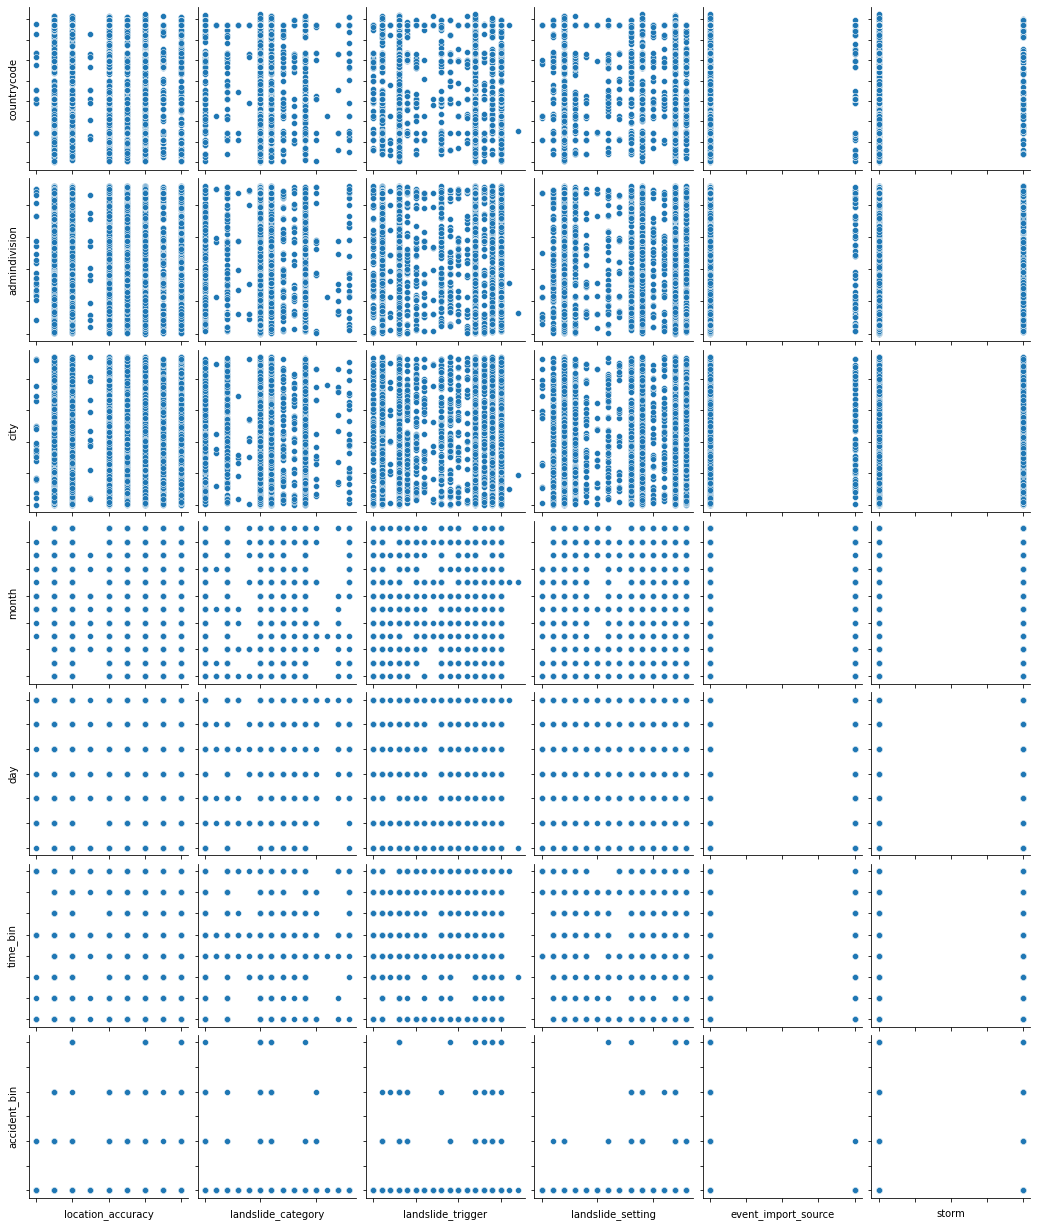

In [ ]:
p4=sns.pairplot(X,y_vars=['countrycode', 'admindivision', 'city', 'month', 'day', 'time_bin', 
                          'accident_bin'], x_vars=['location_accuracy','landslide_category',
                     'landslide_trigger','landslide_setting', 'event_import_source', 'storm'] )
p4.set(xticklabels=[])
p4.set(yticklabels=[])
plt.show()

## 4.3 Regression plots to identify the linear relationship between each attribute with the target variable. 


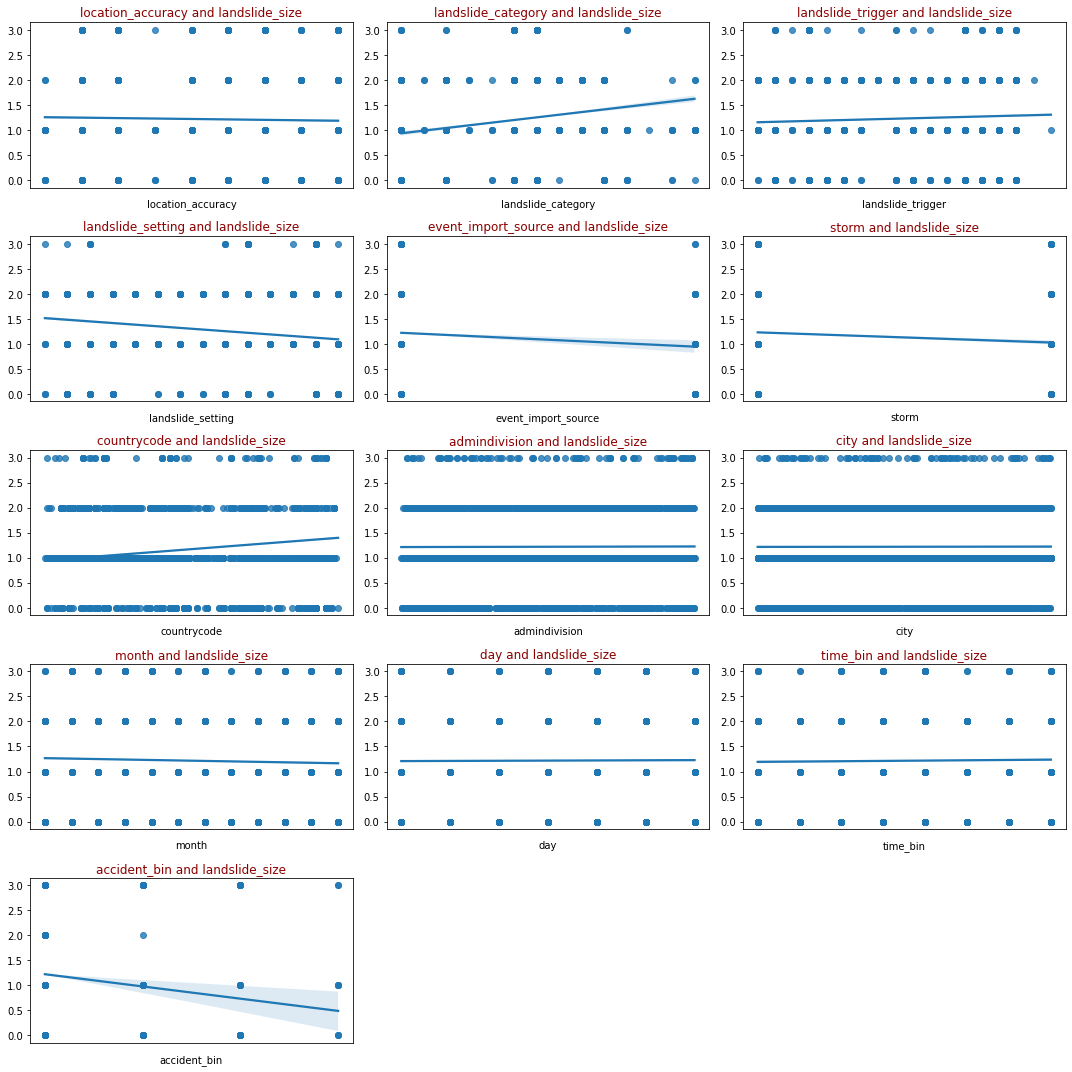

In [ ]:
##---------Type the code below this line------------------##
def draw_regplot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        g1=sns.regplot(x=dataframe[feature], y=y, ax=ax)
        
        ax.set_title(feature+" and landslide_size",color='DarkRed')
        g1.set(xticklabels=[])
        g1.tick_params(bottom=False)
    fig.tight_layout()  
    plt.show()
draw_regplot(X,X.columns,5,3)

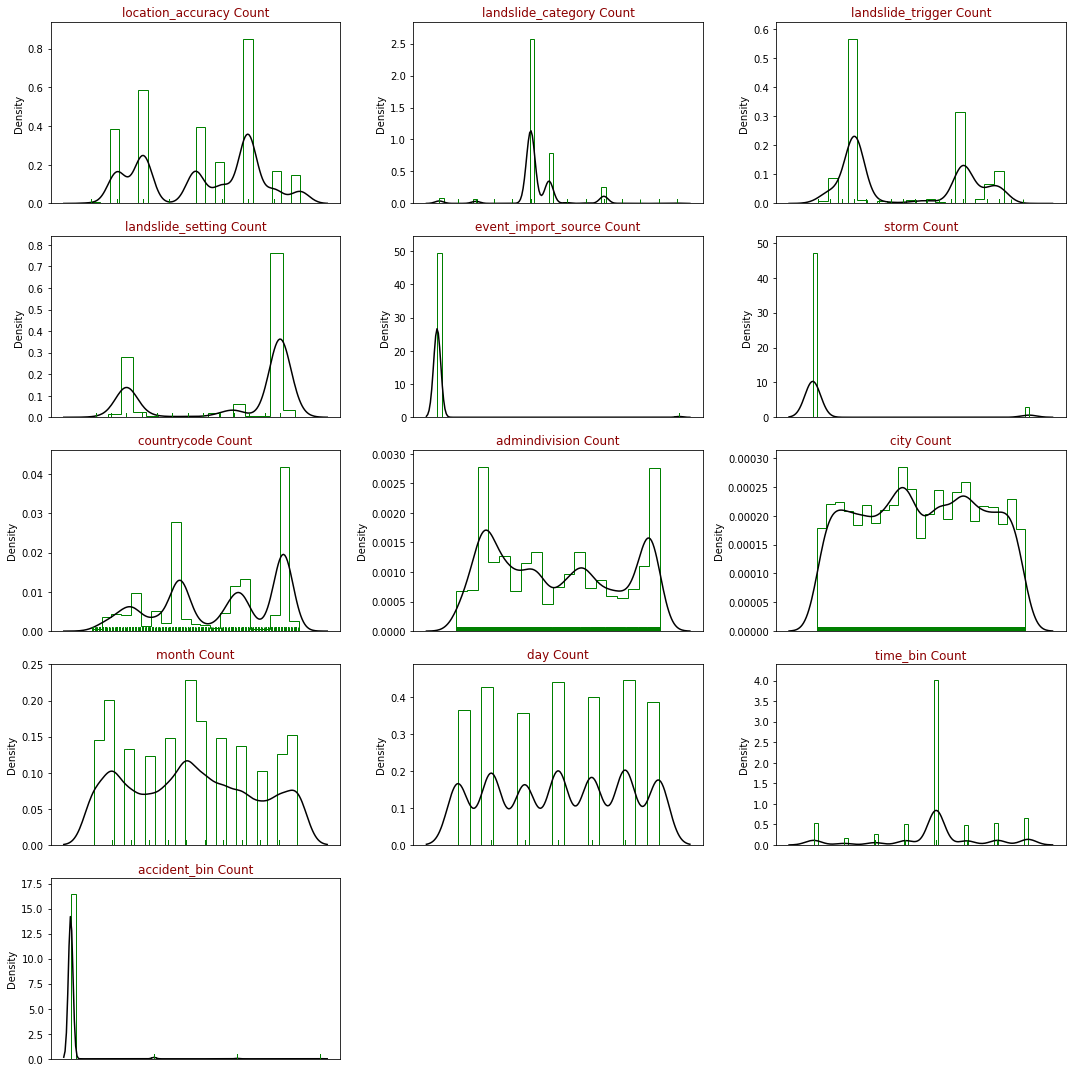

In [ ]:
##---------Type the code below this line------------------##
# plotting distplot to view the distribution of all variables
def draw_distplot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(15,15))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        g1=sns.distplot(x=dataframe[feature],rug=True, rug_kws={"color": "g"},
                        kde_kws={"color": "k" }, hist_kws={"histtype": "step",
                                                                     "alpha": 1, "color": "g"})
        g1.set(xticklabels=[])
        g1.tick_params(bottom=False)
        ax.set_title(feature+" Count",color='DarkRed')
    fig.tight_layout()  
    plt.show()
draw_distplot(X,X.columns,5,3)

# 5. Data Wrangling



## 5.1 Display correlation heatmap of each attribute against the target and report which features are significant.

In [ ]:
##---------Type the code below this line------------------##
#as our variables are categorical we will use chi square test to generate correlation matrix
df_x=pd.DataFrame(X)
df_y=pd.DataFrame(y,columns=['landslide_size'])
chi_df=pd.concat([df_x,df_y],axis=1)
factors_paired = [(i,j) for i in chi_df.columns.values for j in chi_df.columns.values] 

chiarray, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(chi_df[f[0]], chi_df[f[1]]))   
        chiarray.append(chitest[0])
        p_values.append(chitest[1])
    else:      
        chiarray.append(0)
        p_values.append(0)

chiarray = np.array(chiarray).reshape((14,14))


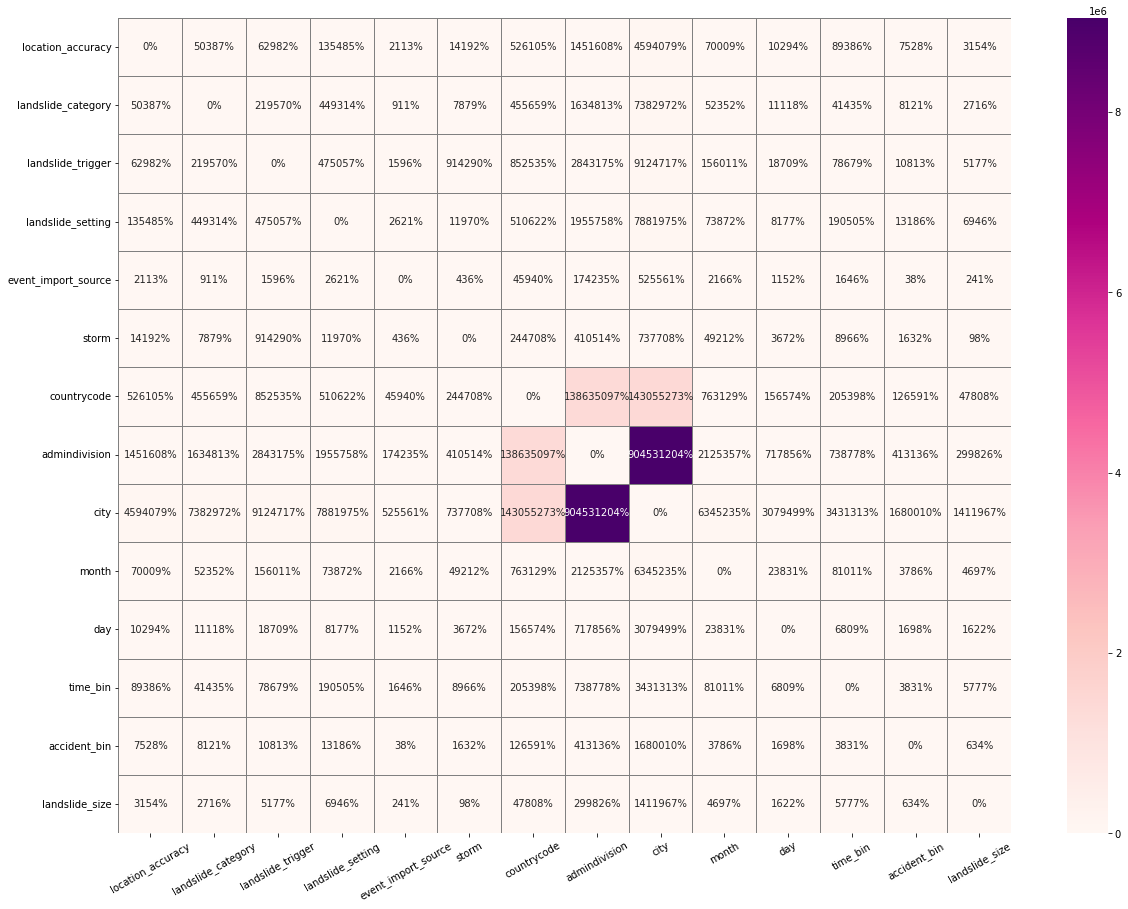

In [ ]:
#correlation matrix heatmap of each attrubute against landslide_size (target)
plt.rcParams["figure.figsize"]=20,15
ax=sns.heatmap(chiarray,annot=True,fmt=".0%",linewidths=1,linecolor='gray',cmap="RdPu")
ax.set_xticklabels(labels=chi_df.columns, rotation=30)
ax.set_yticklabels(labels=chi_df.columns, rotation=0)
plt.show()

From above correlation values we came to know that admindivision, city are correlated features. So we will remove admindivison from the dataset. 

In [ ]:
X=X.drop('admindivision',axis=1)

## 5.2 Univariate Filters – Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score


Write your observations from the results of each method and report the top 5 significant features for each of the above methods. Also plot a graph of significant features for each of them for better visualization.

#### 1. Feature selection by Mutual Information

In [ ]:
##---------Type the code below this line------------------##
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=5)
fit = bestfeatures.fit(X,y)
micscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,micscores],axis=1)
featureScores.columns = ['Specs','Score']
bestfeature_columns_mic=featureScores.nlargest(5, ['Score'])
bestfeature_columns_mic.set_index('Specs', inplace=True)
bestfeature_columns_mic.index.name = None
bestfeature_columns_mic

,Score
countrycode,0.113568
city,0.104498
location_accuracy,0.055623
landslide_setting,0.055034
time_bin,0.031284


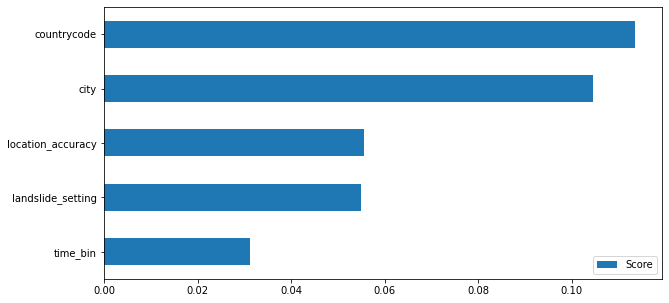

In [ ]:
b1=bestfeature_columns_mic.sort_values('Score',ascending=True).plot(kind='barh',figsize = (10,5),ylabel=None)
b1.set(ylabel=None)
plt.show()

#### 2. Feature Selection by Gini Index

In [ ]:
giniscore = ExtraTreesClassifier(criterion ='gini', max_features = None)
giniscore.fit(X, y)
giniindex = pd.DataFrame(giniscore.feature_importances_)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,giniindex],axis=1)
featureScores.columns = ['Specs','Score']
bestfeature_columns_gini=featureScores.nlargest(5, ['Score'])
bestfeature_columns_gini.set_index('Specs', inplace=True)
bestfeature_columns_gini.index.name = None
bestfeature_columns_gini

,Score
city,0.168193
countrycode,0.154892
month,0.128242
day,0.114346
landslide_setting,0.096541


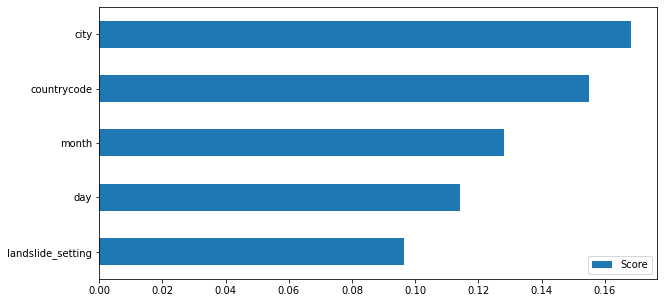

In [ ]:
b1=bestfeature_columns_gini.sort_values('Score',ascending=True).plot(kind='barh',figsize = (10,5),ylabel=None)
b1.set(ylabel=None)
plt.show()

#### 3. Feature selection by Chi-Squared test

In [ ]:
chi2_features=SelectKBest(chi2, k=5).fit(X, y)
chiscores = pd.DataFrame(chi2_features.scores_)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,chiscores],axis=1)
featureScores.columns = ['Specs','Score']
bestfeature_columns_chi=featureScores.nlargest(5, ['Score'])
bestfeature_columns_chi.set_index('Specs', inplace=True)
bestfeature_columns_chi.index.name = None
bestfeature_columns_chi

,Score
countrycode,12222.239645
landslide_setting,1978.509908
city,1260.325995
accident_bin,1096.308166
landslide_trigger,285.155079


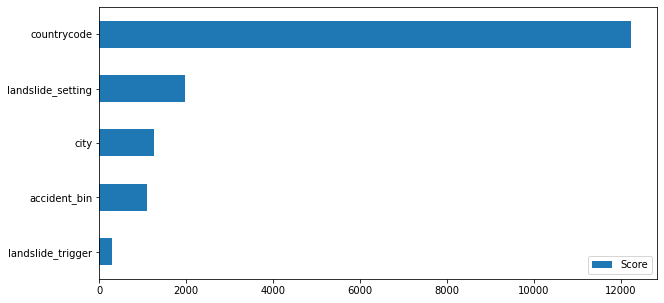

In [ ]:
b1=bestfeature_columns_chi.sort_values('Score',ascending=True).plot(kind='barh',figsize = (10,5),ylabel=None)
b1.set(ylabel=None)
plt.show()

## 5.3 Train a “DecisionTreeClassifier” on the entire data and use the classifier to extract the top 5 significant features. Plot graph of significant features for better visualization.

In [ ]:
##---------Type the code below this line------------------##
Dtree = DecisionTreeClassifier(criterion ='entropy')
Dtree.fit(X, y)
dtreescores = pd.DataFrame(Dtree.feature_importances_)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dtreescores],axis=1)
featureScores.columns = ['Specs','Score']
bestfeature_columns_dt=featureScores.nlargest(5, ['Score'])
bestfeature_columns_dt.set_index('Specs', inplace=True)
bestfeature_columns_dt.index.name = None
bestfeature_columns_dt

,Score
city,0.257280
countrycode,0.175915
month,0.122998
day,0.092003
location_accuracy,0.082501


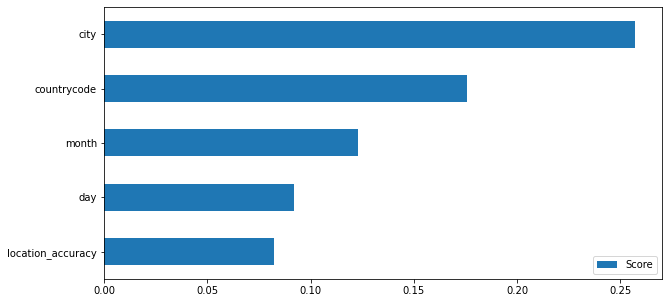

In [ ]:
b1=bestfeature_columns_dt.sort_values('Score',ascending=True).plot(kind='barh',figsize = (10,5),ylabel=None)
b1.set(ylabel=None)
plt.show()

Splitting the data to train a model and checking accuracy on test data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=35)
model=DecisionTreeClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.19      0.17      0.18       230
           1       0.73      0.72      0.73      1979
           2       0.48      0.51      0.49       790
           3       0.04      0.05      0.04        21

    accuracy                           0.62      3020
   macro avg       0.36      0.36      0.36      3020
weighted avg       0.62      0.62      0.62      3020



## 5.4 Using "mlxtend" library perform SequentialFeatureSelector to identify top 5 features.

In [ ]:
##---------Type the code below this line------------------##
sfs = SFS(Dtree, 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)


sfs.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-02-21 19:13:56] Features: 1/5 -- score: 0.8337969401947148[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.6s finished

[2022-02-21 19:13:56] Features: 2/5 -- score: 0.927081263659845[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished

[2022-02-21 19:13:57] Features: 3/5 -- score: 0.9711901450427181[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

SequentialFeatureSelector(cv=0,
                          estimator=DecisionTreeClassifier(criterion='entropy'),
                          k_features=5, scoring='accuracy', verbose=2)

Checking the top 5 features:

In [ ]:
df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()
df_SFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(7,)",[0.8337969401947148],0.833797,"(city,)"
2,"(7, 9)",[0.927081263659845],0.927081,"(city, day)"
3,"(7, 8, 9)",[0.9711901450427181],0.97119,"(city, month, day)"
4,"(0, 7, 8, 9)",[0.9879793363798927],0.987979,"(location_accuracy, city, month, day)"
5,"(0, 7, 8, 9, 10)",[0.992847208424399],0.992847,"(location_accuracy, city, month, day, time_bin)"


In [ ]:
df_SFS_results['feature_names'][5]

('location_accuracy', 'city', 'month', 'day', 'time_bin')

Conlusion : Top 5 features are 
1. city
2. day
3. month
4. location_accuracy
5. time_bin

## 5.5 Conclude the top 3 significant features with necessary justifications.

--------------Type the answers below this line--------------

After observing all above Feature Selection techniques, we can see there are several columns which got selected by multiple algorithms. We are selecting the features which got selected more number of times and we got below 3 as the 3 significant features:

-  city
-  countrycode
-  month